Objective:
To predict the progression of diabetes based on a patient's BMI.

Usage:
This model can help healthcare professionals understand how BMI influences diabetes progression and potentially aid in patient management and treatment decisions.

Loading the dataset 

In [4]:
from sklearn import datasets
import numpy as np

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

Checking dataset dimensions

In [17]:
print(datasets.load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
import matplotlib.pyplot as plt

# Extracting the BMI feature
diabetes_X_bmi = diabetes_X[:, np.newaxis, 2]



Plotting data

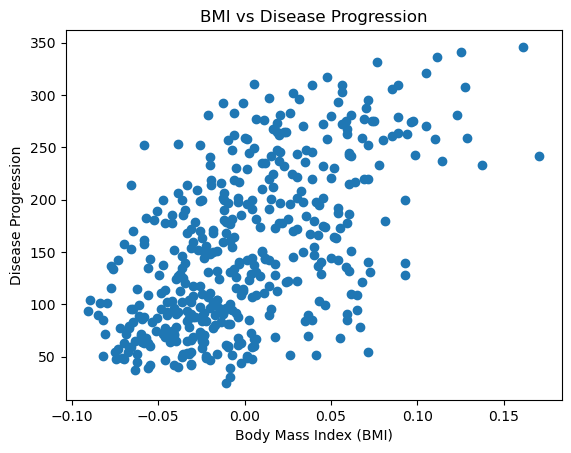

In [7]:
# Plotting the data
plt.scatter(diabetes_X_bmi, diabetes_y)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('BMI vs Disease Progression')
plt.show()


Selecting and training model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitying the dataset inti tain and test model sets 
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_bmi, diabetes_y, test_size=0.2, random_state=42)

# Create the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Get the model parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f'Model parameters: Slope = {slope}, Intercept = {intercept}')


Model parameters: Slope = 998.577689137559, Intercept = 152.00335421448167


Fine tunning the model


In [9]:
# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'Mean Squared Error on Testing Set: {mse_test}')


Mean Squared Error on Training Set: 3854.11265207582
Mean Squared Error on Testing Set: 4061.8259284949263


Visualizing 

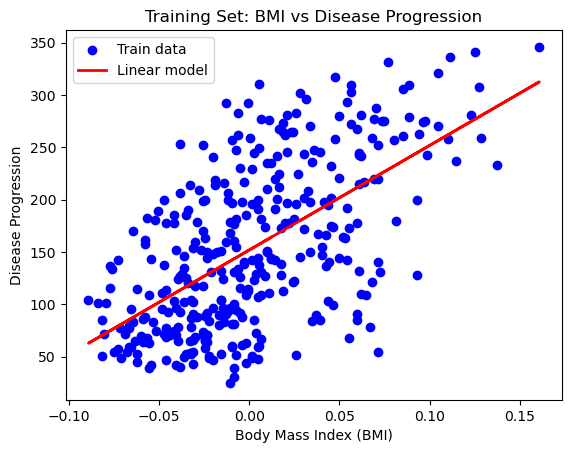

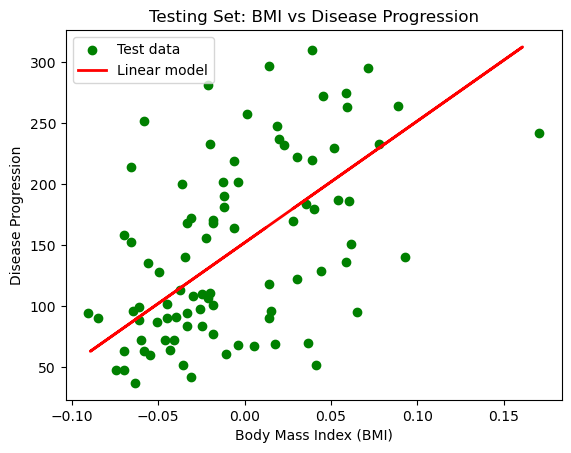

In [11]:
# Plotting the training data with the model
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Linear model')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('Training Set: BMI vs Disease Progression')
plt.legend()
plt.show()

# Plotting the testing data with the model
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Linear model')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('Testing Set: BMI vs Disease Progression')
plt.legend()
plt.show()
